In [39]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [15]:
clusters_path = '/home/mldantas/Documentos/Research/Doutorado_Obrig/POPEST/clusters'
tracks_path   = '/home/mldantas/Documentos/Research/Doutorado_Obrig/POPEST/tracks'

In [3]:
clusters = []
for i in range(4):
    if i==0:
        continue
    cluster_name = 'cluster_0'+str(i)+'.dat'
    clusters.append(cluster_name)
clusters = np.array(clusters)

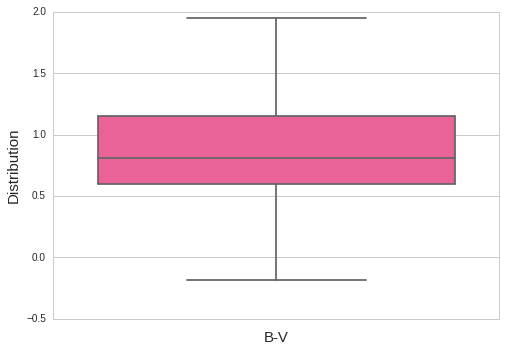

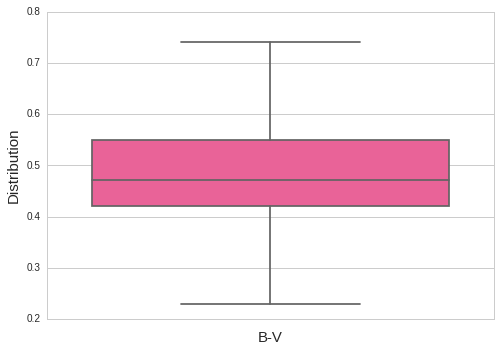

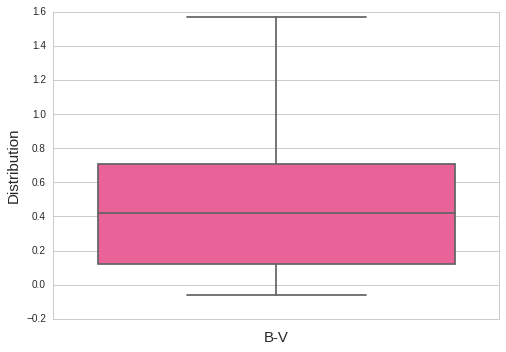

In [16]:
for i in range(clusters.size):
    cluster  = np.loadtxt(os.path.join(clusters_path, clusters[i]), dtype=float)
    v_band   = cluster[:,0].astype(float)
    bv_color = cluster[:,1].astype(float)
    
    my_palette = ['#ff4d94']
    sns.set_style("whitegrid")
    sns.boxplot(y=bv_color, palette=my_palette, showfliers=False)
    plt.ylabel('Distribution', fontsize=15)
    plt.xlabel('B-V', fontsize=15)
    plt.show()

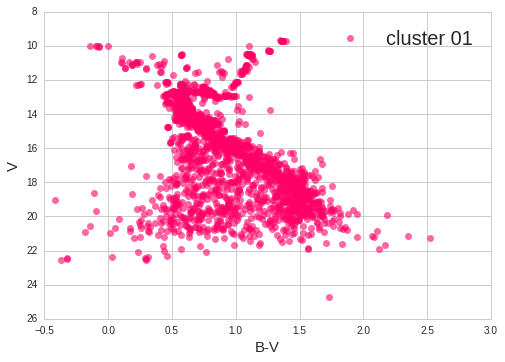

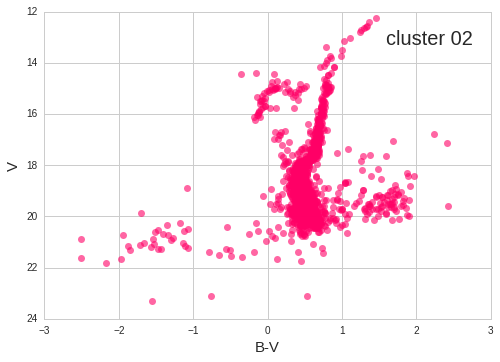

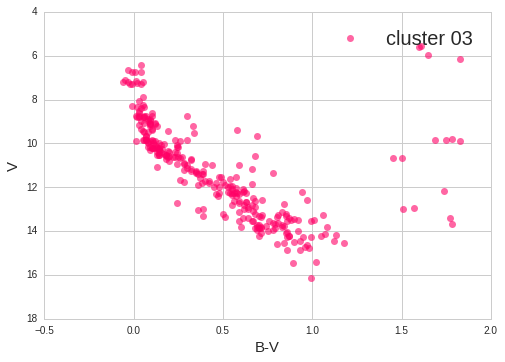

In [17]:
for i in range(clusters.size):
    cluster  = np.loadtxt(os.path.join(clusters_path, clusters[i]), dtype=float)
    v_band   = cluster[:,0].astype(float)
    bv_color = cluster[:,1].astype(float)
    
    index = [(v_band<26) * (bv_color>-5)]
              
    plt.plot(bv_color[index], v_band[index], 'o', color='#ff0066', alpha=0.6, label='cluster %s' % clusters[i][8:10])
    plt.ylabel('V', fontsize=15)
    plt.xlabel('B-V', fontsize=15)
    plt.legend(loc=1, numpoints=1, fontsize=20, frameon=False)
    plt.gca().invert_yaxis()
    plt.minorticks_on()
    plt.show()

In [6]:
evolutionary_tracks_files = ['a7_z0001.dat', 'a7_z001.dat', 'a7_z015.dat', 'a7_z01.dat', 'a8_z0001.dat',
                             'a8_z001.dat', 'a8_z015.dat', 'a8_z01.dat', 'a9_z0001.dat', 'a9_z001.dat', 
                             'a9_z015.dat', 'a9_z01.dat', 'a5e9_z0001.dat', 'a5e9_z001.dat', 
                             'a5e9_z015.dat', 'a5e9_z01.dat', 'a13e9_z0001.dat', 'a13e9_z001.dat',
                             'a13e9_z015.dat', 'a13e9_z01.dat']

In [7]:
print len(evolutionary_tracks_files)

20


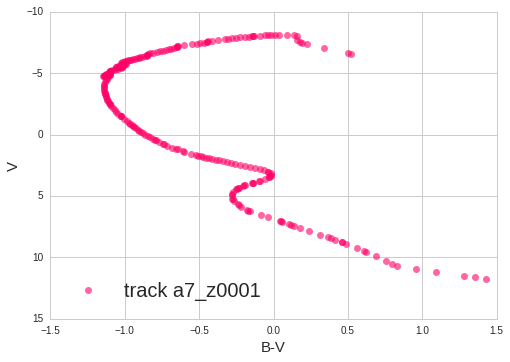

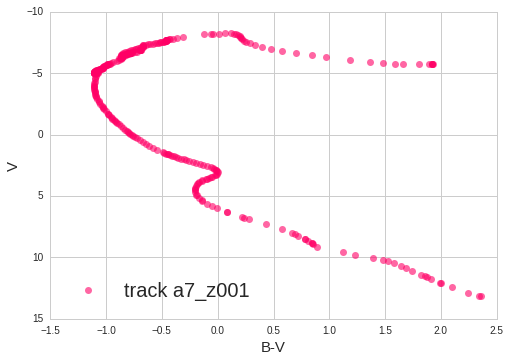

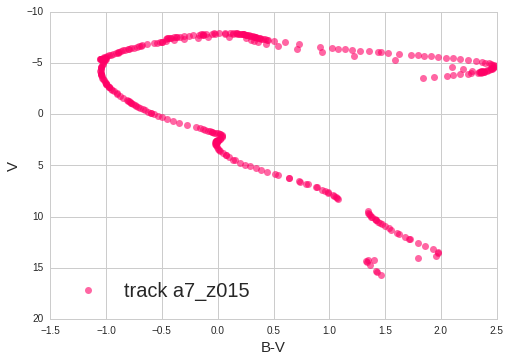

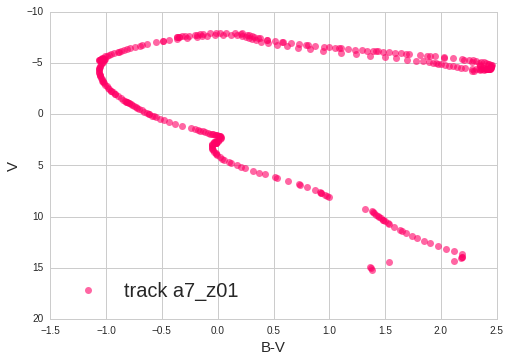

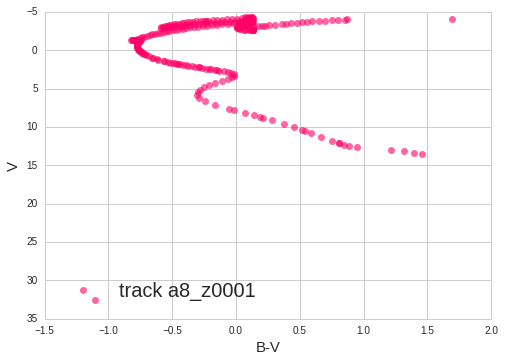

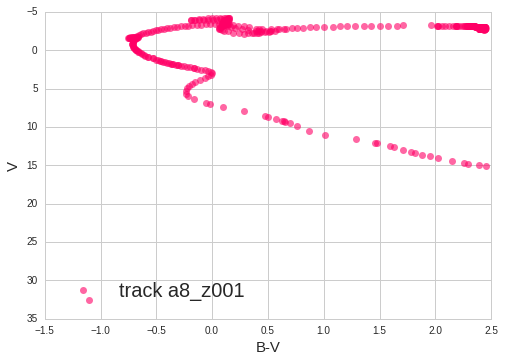

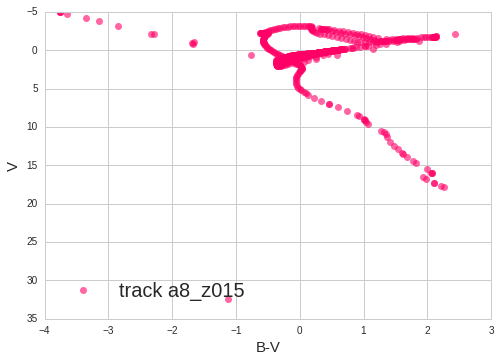

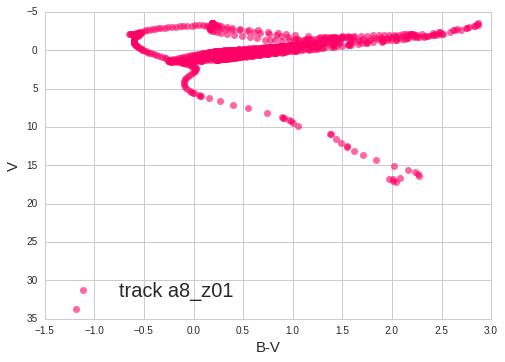

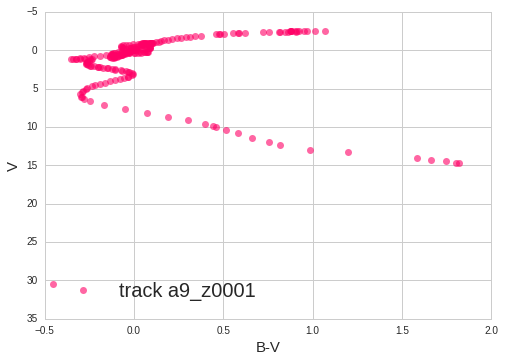

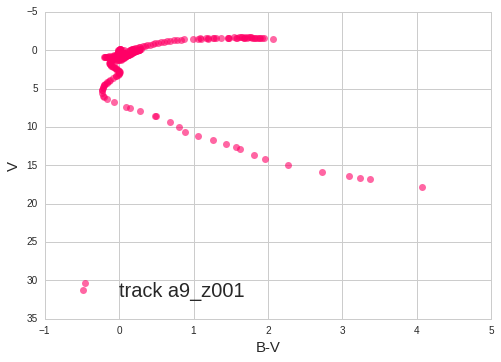

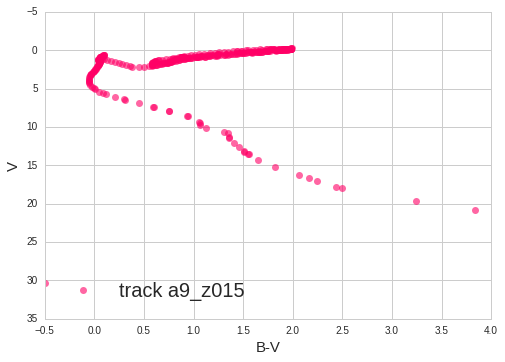

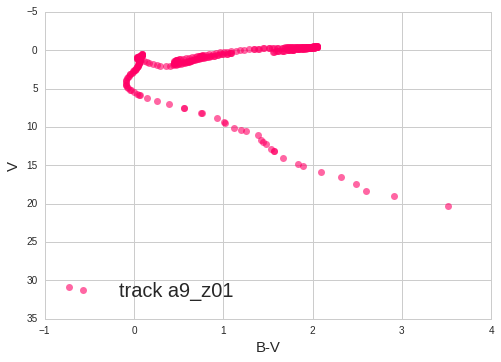

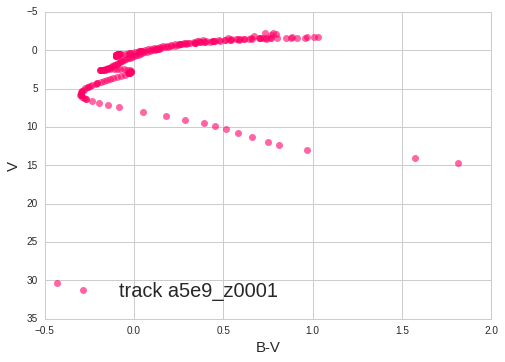

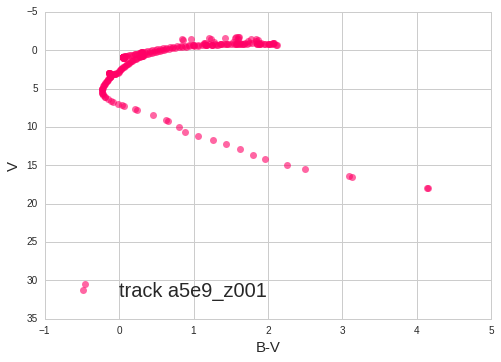

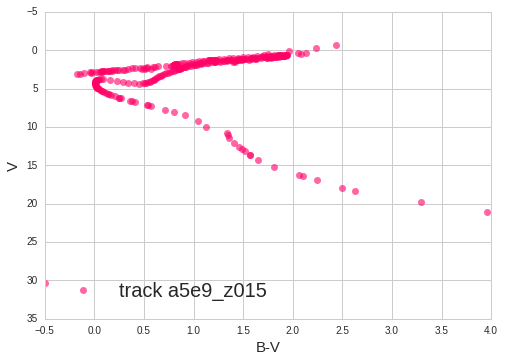

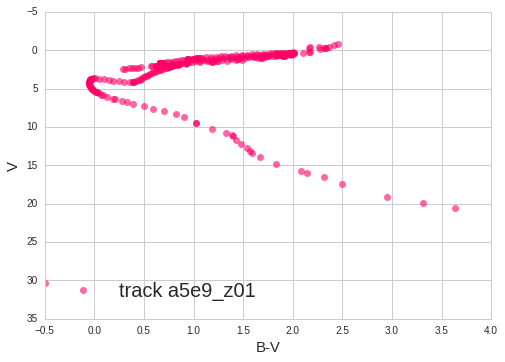

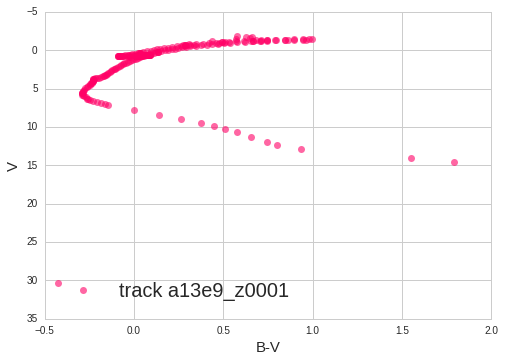

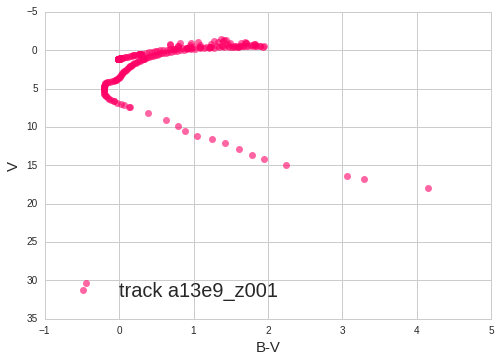

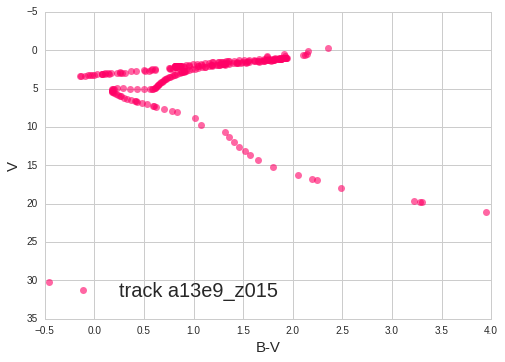

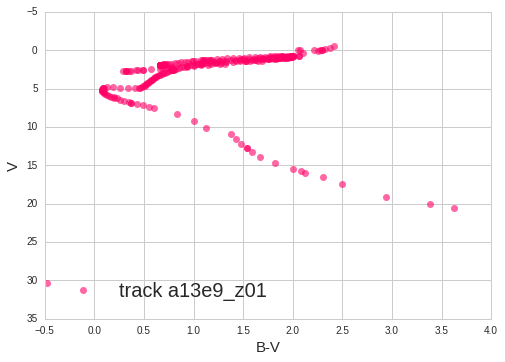

In [18]:
for k in range(len(evolutionary_tracks_files)):
    evol_track = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[k]), dtype=str)
    b_band_e   = evol_track[:,23].astype(float)
    v_band_e   = evol_track[:,24].astype(float)
    bv_color_e = b_band_e-v_band_e
    
    current_track = np.array(evolutionary_tracks_files)[k]
    current_track = current_track.split('.')[0]
    
    new_bv_color_e = []
    new_v_band_e = []
    for each_color in range(bv_color_e.size):
        if bv_color_e[each_color] > 10:
            continue
        else:
            new_bv_color_e.append(bv_color_e[each_color])
            new_v_band_e.append(v_band_e[each_color])
    new_bv_color_e = np.array(new_bv_color_e)
    new_v_band_e = np.array(new_v_band_e)
              
    plt.plot(new_bv_color_e, new_v_band_e, 'o', color='#ff0066', alpha=0.6, label='track %s' % current_track)
    plt.ylabel('V', fontsize=15)
    plt.xlabel('B-V', fontsize=15)
    plt.legend(loc=3, numpoints=1, fontsize=20, frameon=False)
    plt.minorticks_on()
    plt.gca().invert_yaxis()
    plt.show()

In [44]:
for c in range(clusters.size):
    cluster_c  = np.loadtxt(os.path.join(clusters_path, clusters[c]), dtype=float)
    v_band_c   = cluster[:,0].astype(float)
    bv_color_c = cluster[:,1].astype(float)
    
    print('%15s' % 'Current Cluster', '%15s' % 'Current Track', '%15s' % 'avg[Distance(B-V)s]')
    
    clust     = []
    track     = []
    distances = []
    for e in range(len(evolutionary_tracks_files)):
        current_track = np.array(evolutionary_tracks_files)[e]
        current_track = current_track.split('.')[0]
        evol_track = np.loadtxt(os.path.join(tracks_path, evolutionary_tracks_files[e]), dtype=str)
        b_band_e   = evol_track[:,23].astype(float)
        v_band_e   = evol_track[:,24].astype(float)
        bv_color_e = b_band_e-v_band_e
        
        distance = []
        for j in range(bv_color_c.size):
            closest_index  = np.abs(bv_color_c[j]-bv_color_e).argmin()
            distance_i = bv_color_c[j]-bv_color_e[closest_index]
            distance.append(distance_i)
        distance = np.array(distance)
        avg_distance = np.average(distance)
        
        distances.append(np.abs(avg_distance))
        clust.append(clusters[c].split('.')[0])
        track.append(current_track)
        print('%15s' % clusters[c].split('.')[0], '%15s' % current_track, '%15f' % avg_distance)

    distances = np.array(distances)
    clust = np.array(clust)
    track = np.array(track)
    
    current_dataframe = np.column_stack((clust, track, distances))
    
    
    print ('----------------------------------------------------------------------------------------')
    print ('----------------------------------------------------------------------------------------')
    
    print current_dataframe[np.where(np.amin(distances))]
#     print('%15s' % 'Cluster', '%15s' % 'Track', '%15s' % 'closest distance')
    
#     print('%15s' % clust[[distances.min()]], '%15s' % track[[distances.min()]], '%15f' % distances[[distances.min()]])
    
    print ('----------------------------------------------------------------------------------------')
    print ('----------------------------------------------------------------------------------------')

('Current Cluster', '  Current Track', 'avg[Distance(B-V)s]')
('     cluster_01', '       a7_z0001', '       0.013132')
('     cluster_01', '        a7_z001', '      -0.000512')
('     cluster_01', '        a7_z015', '      -0.000715')
('     cluster_01', '         a7_z01', '       0.000539')
('     cluster_01', '       a8_z0001', '       0.003817')
('     cluster_01', '        a8_z001', '      -0.000200')
('     cluster_01', '        a8_z015', '      -0.000444')
('     cluster_01', '         a8_z01', '      -0.000125')
('     cluster_01', '       a9_z0001', '      -0.000786')
('     cluster_01', '        a9_z001', '       0.000969')
('     cluster_01', '        a9_z015', '      -0.000512')
('     cluster_01', '         a9_z01', '       0.000027')
('     cluster_01', '     a5e9_z0001', '       0.000105')
('     cluster_01', '      a5e9_z001', '       0.000098')
('     cluster_01', '      a5e9_z015', '       0.000539')
('     cluster_01', '       a5e9_z01', '      -0.000603')
('     clu